# Amazon Customer Reviews - Statistical Analysis
Springboard Data Science Career Track
Capstone 2
by Chantel Clark

## Data
Amazon has an open dataset of over 130 million customer reviews collected between 1995 and 2015, available as URL’s at https://s3.amazonaws.com/amazon-reviews-pds/tsv/index.txt. Reviews are grouped by product categories such as apparel, automotive, books, e-books, etc. The columns in the dataset include: ‘marketplace’ (country code), ‘customer_id’, ‘review_id’, ‘product_id’, ‘product_parent’ (random identifier for aggregate reviews for the same product), ‘product_title’, ‘product_category’, ‘star_rating’, ‘helpful_votes’, ‘total_votes’, ‘vine’, ‘verified_purchase’, ‘review_headline’, ‘review_body’, ‘review_date’.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from random import sample as rsample
from random import seed
import time
from scipy.stats import kruskal
from scipy.stats import mannwhitneyu
from itertools import combinations

In [2]:
# Import sample data from URL
url = 'https://s3.amazonaws.com/amazon-reviews-pds/tsv/sample_us.tsv'

url_data = pd.read_table(url, sep='\t')
sample = pd.DataFrame(url_data, columns=url_data.keys())
print(sample.head())

  marketplace  customer_id       review_id  product_id  product_parent  \
0          US     18778586   RDIJS7QYB6XNR  B00EDBY7X8       122952789   
1          US     24769659  R36ED1U38IELG8  B00D7JFOPC       952062646   
2          US     44331596   R1UE3RPRGCOLD  B002LHA74O       818126353   
3          US     23310293  R298788GS6I901  B00ARPLCGY       261944918   
4          US     38745832    RNX4EXOBBPN5  B00UZOPOFW       717410439   

                                       product_title product_category  \
0                         Monopoly Junior Board Game             Toys   
1  56 Pieces of Wooden Train Track Compatible wit...             Toys   
2         Super Jumbo Playing Cards by S&S Worldwide             Toys   
3           Barbie Doll and Fashions Barbie Gift Set             Toys   
4  Emazing Lights eLite Flow Glow Sticks - Spinni...             Toys   

   star_rating  helpful_votes  total_votes vine verified_purchase  \
0            5              0            0    N

In [3]:
type(sample)

pandas.core.frame.DataFrame

In [4]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 15 columns):
marketplace          49 non-null object
customer_id          49 non-null int64
review_id            49 non-null object
product_id           49 non-null object
product_parent       49 non-null int64
product_title        49 non-null object
product_category     49 non-null object
star_rating          49 non-null int64
helpful_votes        49 non-null int64
total_votes          49 non-null int64
vine                 49 non-null object
verified_purchase    49 non-null object
review_headline      49 non-null object
review_body          49 non-null object
review_date          49 non-null object
dtypes: int64(5), object(10)
memory usage: 5.9+ KB


In [5]:
# Import larger data set - Amazon apparel reviews
# Skips 'bad_lines', gets tokenization error without skipping (C error: expected 15 fields, saw 22)
url = 'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Apparel_v1_00.tsv.gz'

url_data = pd.read_table(url, sep='\t', error_bad_lines=False)
url_df = pd.DataFrame(url_data, columns=url_data.keys())
print(url_df.head())

b'Skipping line 49396: expected 15 fields, saw 22\nSkipping line 57008: expected 15 fields, saw 22\n'
b'Skipping line 82075: expected 15 fields, saw 22\nSkipping line 104435: expected 15 fields, saw 22\nSkipping line 109766: expected 15 fields, saw 22\nSkipping line 124024: expected 15 fields, saw 22\nSkipping line 129914: expected 15 fields, saw 22\nSkipping line 130172: expected 15 fields, saw 22\n'
b'Skipping line 161515: expected 15 fields, saw 22\n'
b'Skipping line 230464: expected 15 fields, saw 22\n'
b'Skipping line 292640: expected 15 fields, saw 22\nSkipping line 293681: expected 15 fields, saw 22\nSkipping line 316511: expected 15 fields, saw 22\nSkipping line 317239: expected 15 fields, saw 22\nSkipping line 326099: expected 15 fields, saw 22\nSkipping line 327595: expected 15 fields, saw 22\n'
b'Skipping line 342645: expected 15 fields, saw 22\nSkipping line 347980: expected 15 fields, saw 22\nSkipping line 376258: expected 15 fields, saw 22\nSkipping line 381192: expected 

  marketplace  customer_id       review_id  product_id  product_parent  \
0          US     32158956  R1KKOXHNI8MSXU  B01KL6O72Y        24485154   
1          US      2714559  R26SP2OPDK4HT7  B01ID3ZS5W       363128556   
2          US     12608825   RWQEDYAX373I1  B01I497BGY       811958549   
3          US     25482800  R231YI7R4GPF6J  B01HDXFZK6       692205728   
4          US      9310286  R3KO3W45DD0L1K  B01G6MBEBY       431150422   

                                       product_title product_category  \
0  Easy Tool Stainless Steel Fruit Pineapple Core...          Apparel   
1  V28 Women Cowl Neck Knit Stretchable Elasticit...          Apparel   
2  James Fiallo Men's 12-Pairs Low Cut Athletic S...          Apparel   
3  Belfry Gangster 100% Wool Stain-Resistant Crus...          Apparel   
4  JAEDEN Women's Beaded Spaghetti Straps Sexy Lo...          Apparel   

   star_rating  helpful_votes  total_votes vine verified_purchase  \
0          4.0            0.0          0.0    N

In [6]:
url_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5881874 entries, 0 to 5881873
Data columns (total 15 columns):
marketplace          object
customer_id          int64
review_id            object
product_id           object
product_parent       int64
product_title        object
product_category     object
star_rating          float64
helpful_votes        float64
total_votes          float64
vine                 object
verified_purchase    object
review_headline      object
review_body          object
review_date          object
dtypes: float64(3), int64(2), object(10)
memory usage: 673.1+ MB


There are 5,881,873 reviews in this dataset.

In [7]:
# Convert 'review_date' column to datetime
url_df['review_date'] = pd.to_datetime(url_df['review_date'])

In [8]:
# Date of the oldest review
min(url_df['review_date'])

Timestamp('2000-09-06 00:00:00')

In [9]:
# Date of the newest review
max(url_df['review_date'])

Timestamp('2015-08-31 00:00:00')

In [10]:
# Some of these are not classified correctly...
print(url_df.iloc[0].product_title)
print(url_df.iloc[100].product_title)

Easy Tool Stainless Steel Fruit Pineapple Corer Slicer Peeler Cut (One size, sliver)
Amdirect Portable Parachute Outdoor Travel Camping Beach Canvas Hammock


In [11]:
url_df.iloc[100].review_body

'very comfortable, soft and easy to install, I love to sleep on it'

In [12]:
url_df[url_df.customer_id == url_df.iloc[0].customer_id]

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,32158956,R1KKOXHNI8MSXU,B01KL6O72Y,24485154,Easy Tool Stainless Steel Fruit Pineapple Core...,Apparel,4.0,0.0,0.0,N,Y,★ THESE REALLY DO WORK GREAT WITH SOME TWEAKING ★,"These Really Do Work Great, But You Do Need To...",2013-01-14


## Customers

In [13]:
# Create a dictionary of unique customers, with value equal to number of reviews written
customers = dict(url_df['customer_id'].value_counts())

In [14]:
# Convert dictionary to dataframe
customer_df = pd.DataFrame(customers.items(), columns=['customer_ID', 'n_reviews'])
customer_df.head()

,customer_ID,n_reviews
0,50612720,559
1,33883540,351
2,33924372,344
3,37474421,281
4,15006109,262


In [15]:
# Print the total number of unique customers
len(customer_df)

3219083

There are 3,219,083 unique customers

In [16]:
print('The mean number of reviews is', np.mean(customer_df.n_reviews))
print('The median number of reviews is', np.median(customer_df.n_reviews))

The mean number of reviews is 1.827189295833627
The median number of reviews is 1.0


The average number of reviews that a customer writes is 1.83, while the median number of reviews per customer is 1. Because the average is larger than the median, it is evident that some customers are posting a very large number of reviews which is skewing the dataset to the right (long right tail). The median number of reviews per customer is low, and could be a result of fake accounts where only one review is posted.

Text(0, 0.5, 'Number of customers')

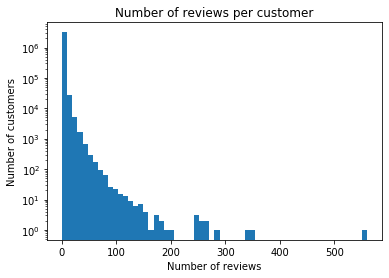

In [17]:
plt.hist(customer_df.n_reviews, bins=60, log=True)
plt.title('Number of reviews per customer')
plt.xlabel('Number of reviews')
plt.ylabel('Number of customers')

In [18]:
n_revs = customer_df.n_reviews
n_revs.describe()

count    3.219083e+06
mean     1.827189e+00
std      2.466301e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      5.590000e+02
Name: n_reviews, dtype: float64

In [19]:
# Find the skew of the data
n_revs.skew()

19.153069126538394

In [20]:
# Log transform the data
n_revs_log = np.log(n_revs)
n_revs_log.describe()

count    3.219083e+06
mean     3.445132e-01
std      5.887699e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      6.931472e-01
max      6.326149e+00
Name: n_reviews, dtype: float64

In [21]:
# Compare the skew to original data - skew is much lower after log tranformation
n_revs_log.skew()

1.8703245642780428

Text(0, 0.5, 'Number of customers')

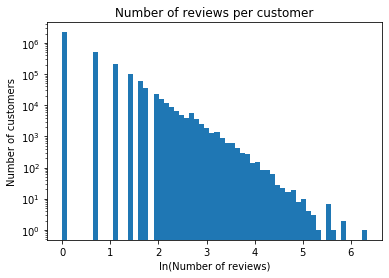

In [22]:
plt.hist(n_revs_log, bins=60, log=True)
plt.title('Number of reviews per customer')
plt.xlabel('ln(Number of reviews)')
plt.ylabel('Number of customers')

Text(0.5, 0, 'ln(n_reviews)')

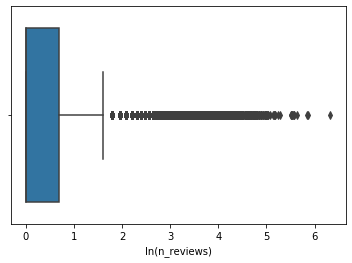

In [23]:
# Create boxplot to identify outliers
sns.boxplot(n_revs_log)
plt.xlabel('ln(n_reviews)')

In [24]:
# Calculate the interquartile range
iqr = n_revs_log.quantile(0.75) - n_revs_log.quantile(0.25)

# Find whisker length
whisker_length = 1.5 * iqr
upper_whisker_loc = n_revs_log.quantile(0.75) + whisker_length
print(upper_whisker_loc)

1.732867951399863


In [25]:
# Transform upper whisker length back to original scale
np.exp(upper_whisker_loc)

5.656854249492379

Customers with more than 5 reviews, considered as outlier. Does not seem right because on average, I think that a 'real' (not fake) customer could write around 5 reviews easily. The large amount of customers that write only one review is still skewing the data.

In [26]:
# Number of outliers
n_outliers = len(n_revs_log[n_revs_log > upper_whisker_loc])
print('outliers:', n_outliers)


outliers: 130943


In [27]:
# Percentage of outliers
n = len(n_revs_log)
n_outliers/n*100

4.067711208440416

4.1% of the customers have reviews that fall above 1.5 x IQR

In [28]:
customer_df.tail()

,customer_ID,n_reviews
3219078,50755942,1
3219079,13001061,1
3219080,42441050,1
3219081,37968162,1
3219082,29362177,1


In [29]:
%%time
####### NATE: Is there a faster way to to this? 
# Star ratings of 1-review customers (2.2 million)
one_hit_cust = customer_df.customer_ID[customer_df.n_reviews == 1]

start_time = time.time()
one_hit_stars = [url_df[url_df['customer_id']==cid].star_rating.iloc[0] for cid in one_hit_cust]
end_time = time.time()

print(end_time - start_time)

30621.059618473053
Wall time: 8h 30min 21s


**~8.5 hours to run the code above**

In [30]:
print(len(one_hit_stars))

2201632


In [31]:
Counter(one_hit_stars)

Counter({3.0: 223733, 4.0: 416831, 5.0: 1190173, 2.0: 150804, 1.0: 220091})

In [32]:
# Percent of 5-star reviews
print(1190173/2201632)
print(416831/2201632)

0.5405867102222351
0.1893281892705048


Text(0.5, 0, 'Star rating')

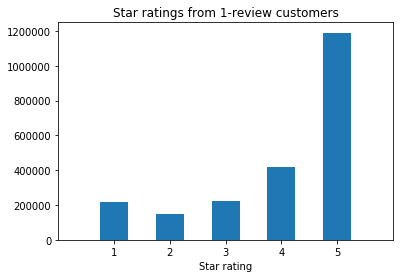

In [33]:
# Histogram of star ratings for one hit stars
plt.hist(one_hit_stars, bins=np.arange(1,7)-.5, rwidth=0.5)
plt.title('Star ratings from 1-review customers')
plt.xticks(range(1,6))
plt.xlim([0,6])
plt.xlabel('Star rating')

In [34]:
# Percent of verified purchases - purchased from Amazon
len(url_df[url_df['verified_purchase'] == 'Y']) / len(url_df)

0.899424911176268

In [35]:
# Number of customers that have only posted 1 review
len(customer_df.customer_ID[customer_df.n_reviews == 1])

2201632

In [36]:
# Percent of reviews from 'one hit wonders'
len(customer_df.customer_ID[customer_df.n_reviews == 1])/ len(url_df)

0.374307916150533

In [37]:
# Group customers by number of reviews written
#group_a = customer_df[customer_df.n_reviews == 1] # same as one hit cust
group_b = customer_df[(customer_df.n_reviews >= 2) & (customer_df.n_reviews <=5)]
group_c = customer_df[(customer_df.n_reviews >= 6) & (customer_df.n_reviews <=9)]
group_d = customer_df[(customer_df.n_reviews >= 10) & (customer_df.n_reviews <=12)]
group_e = customer_df[customer_df.n_reviews >= 13]

In [38]:
# Function to match customer ID to url_df, and get a series of star ratings
def get_stars(group):
    # Create pd Series
    s = pd.Series()
    # Customer id's
    ids = group.customer_ID
    # Append each star rating into series, s
    for cid in ids:
        s = s.append(url_df[url_df['customer_id']==cid].star_rating, ignore_index=True)
    return s

In [39]:
%%time
e = get_stars(group_e)

d = get_stars(group_d)

c = get_stars(group_c)

b = get_stars(group_b)

a = one_hit_stars


Wall time: 4h 44min 7s


Text(0.5, 0, 'Star rating')

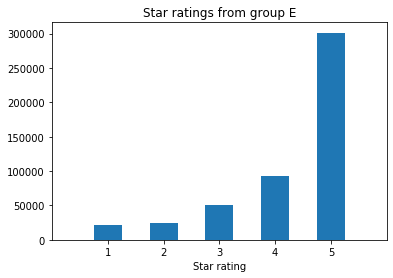

In [53]:
# Histogram of star ratings, group e
plt.hist(e, bins=np.arange(1,7)-.5, rwidth=0.5)
plt.title('Star ratings from group E')
plt.xticks(range(1,6))
plt.xlim([0,6])
plt.xlabel('Star rating')

A normal distribution is not expected in this case because the data is ordinal.

In [65]:
# Print out a dataframe of group name, number, average and median star rating
groups = ['A', 'B', 'C', 'D', 'E']
descr = ['1 review', '2-5 reviews', '6-9 reviews', '10-12 reviews', '13 or more reviews']
group_ratings = [a,b,c,d,e]
ns = [len(x) for x in group_ratings]
medians = [np.nanmedian(x) for x in group_ratings]
means = [round(np.mean(x),3) for x in group_ratings]

groups_df_mean = pd.DataFrame({'group':groups, 'n':ns, 'description':descr, 
                               'mean star rating':means, 'median star rating':medians})
groups_df_mean.set_index('group', inplace=True)
groups_df_mean

,n,description,mean star rating,median star rating
group,,,,
A,2201632,1 review,4.002,5.0
B,2359266,2-5 reviews,4.130,5.0
C,615344,6-9 reviews,4.198,5.0
D,214124,10-12 reviews,4.228,5.0
E,491508,13 or more reviews,4.280,5.0


While all groups have a median of 5, the mean star ratings increase slightly as number of reviews written per customer increases.

In [66]:
# Kruskal Wallis test. H0 = 3 or more groups have the same median
kruskal(c,d,e, nan_policy='omit')

KruskalResult(statistic=1298.9351474192495, pvalue=8.705957902761955e-283)

p-value is very close to 0, therefore we reject the null and can verify that the groups have different medians/distributions.

In [67]:
# Make a list of pair names
pairs = [pair for pair in combinations(groups,2)]
pairs

[('A', 'B'),
 ('A', 'C'),
 ('A', 'D'),
 ('A', 'E'),
 ('B', 'C'),
 ('B', 'D'),
 ('B', 'E'),
 ('C', 'D'),
 ('C', 'E'),
 ('D', 'E')]

In [68]:
# Conduct Mann-Whitney U tests for each pair, store results in stats and ps. 
# Matt-Whitney U test. H0 = 2 groups have the same median
stats = []
ps = []

for pair in combinations(group_ratings,2):
    stat, p = mannwhitneyu(pair[0], pair[1])
    stats.append(stat)
    ps.append(p)

In [69]:
# Round results to 3 decimals in scientific notation
stats = ['{:0.3e}'.format(stat) for stat in stats]
ps = ['{:0.3e}'.format(p) for p in ps]

In [70]:
# Create a data frame of Mann-Whitney U results
mw_results = pd.DataFrame({'Groups':pairs, 'Statistic':stats, 'P-value':ps})
mw_results.set_index('Groups', inplace=True)
mw_results

,Statistic,P-value
Groups,,
"(A, B)",2.497e+12,0.000e+00
"(A, C)",6.350e+11,0.000e+00
"(A, D)",2.181e+11,0.000e+00
"(A, E)",4.889e+11,0.000e+00
"(B, C)",7.082e+11,2.013e-236
"(B, D)",2.433e+11,1.835e-218
"(B, E)",5.455e+11,0.000e+00
"(C, D)",6.505e+10,4.009e-23
"(C, E)",1.459e+11,1.299e-283
